# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pjbla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
news_api_key = os.getenv("news_api_key")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language="en",
    sort_by="relevancy"
)
#bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")

bitcoin_news["totalResults"]

4728

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q="Ethereum", language="en")
ethereum_news["totalResults"]

1301

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
def df_maker(news, language):
    articles = []
    for article in news:
        try:
            sentiment = analyzer.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "Title": title,
                "Description": description,
                "Text": text,
                "Date": date,
                "Compound": sentiment["compound"],
                "Positive": sentiment["pos"],
                "Negative": sentiment["neg"],
                "Neutral": sentiment["neu"],
            })
            
            cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)[cols]

bitcoin_df = df_maker(bitcoin_news["articles"],"en")
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,A former Microsoft software engineer from Ukra...
1,0.4854,0.045,0.818,0.137,Visa has partnered with cryptocurrency startup...
2,0.2144,0.000,0.955,0.045,PayPal is bringing its newly-announced support...
3,0.2023,0.000,0.958,0.042,"In November 2017, after an absolutely massive,..."
4,0.5574,0.000,0.899,0.101,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_df = df_maker(ethereum_news["articles"],"en")

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.2144,0.0,0.955,0.045,PayPal is bringing its newly-announced support...
1,0.4215,0.0,0.859,0.141,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.859,0.141,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.0,0.859,0.141,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.0,0.958,0.042,NEW YORK (Reuters) - Institutional investors p...


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.153775,0.016950,0.929850,0.053200
std,0.323520,0.037801,0.072051,0.064521
min,-0.624900,0.000000,0.809000,0.000000
25%,0.000000,0.000000,0.870250,0.000000
50%,0.101150,0.000000,0.956000,0.021000
75%,0.421500,0.000000,1.000000,0.107750
max,0.735100,0.126000,1.000000,0.188000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.212795,0.022000,0.896500,0.081600
std,0.327400,0.056152,0.094811,0.070666
min,-0.542300,0.000000,0.679000,0.000000
25%,0.000000,0.000000,0.859000,0.031500
50%,0.196150,0.000000,0.896000,0.074000
75%,0.406800,0.000000,0.968500,0.123000
max,0.877900,0.213000,1.000000,0.262000


### Questions:

Q: Which coin had the highest mean positive score?

A: etherem

Q: Which coin had the highest compound score?

A: etherem

Q. Which coin had the highest positive score?

A: etherem


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [20]:
# Complete the tokenizer function

def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    

In [29]:
# Create a new tokens column for Bitcoin
bitcoin_df['Text'] = str(bitcoin_df['Text'])
btc_tokens = []
for i in bitcoin_df['Text']:
    tokenized_text = tokenizer(i)
    btc_tokens.append({'tokens':tokenized_text})

btc_tokens_df = pd.DataFrame(btc_tokens)
bitcoin_df['tokens'] = btc_tokens_df
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.0000,0.000,1.000,0.000,0 A former Microsoft software engineer fro...,"[former, microsoft, software, engineer, ukra, ..."
1,0.4854,0.045,0.818,0.137,0 A former Microsoft software engineer fro...,"[former, microsoft, software, engineer, ukra, ..."
2,0.2144,0.000,0.955,0.045,0 A former Microsoft software engineer fro...,"[former, microsoft, software, engineer, ukra, ..."
3,0.2023,0.000,0.958,0.042,0 A former Microsoft software engineer fro...,"[former, microsoft, software, engineer, ukra, ..."
4,0.5574,0.000,0.899,0.101,0 A former Microsoft software engineer fro...,"[former, microsoft, software, engineer, ukra, ..."


In [30]:
# Create a new tokens column for Ethereum
ethereum_df['Text'] = str(ethereum_df['Text'])

eth_tokens = []
for i in ethereum_df['Text']:
    tokenized_text = tokenizer(i)
    eth_tokens.append({'tokens':tokenized_text})

eth_tokens_df = pd.DataFrame(eth_tokens)
ethereum_df['tokens'] = eth_tokens_df
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.2144,0.0,0.955,0.045,0 0 0 PayPal is bringing its newly...,"[paypal, bringing, newlyannou, paypal, bringin..."
1,0.4215,0.0,0.859,0.141,0 0 0 PayPal is bringing its newly...,"[paypal, bringing, newlyannou, paypal, bringin..."
2,0.4215,0.0,0.859,0.141,0 0 0 PayPal is bringing its newly...,"[paypal, bringing, newlyannou, paypal, bringin..."
3,0.4215,0.0,0.859,0.141,0 0 0 PayPal is bringing its newly...,"[paypal, bringing, newlyannou, paypal, bringin..."
4,0.1779,0.0,0.958,0.042,0 0 0 PayPal is bringing its newly...,"[paypal, bringing, newlyannou, paypal, bringin..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [31]:
from collections import Counter
from nltk import ngrams

In [32]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = " ".join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(15))
    return pd.DataFrame(list(top_15.items()), columns=['word','count'])

In [33]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
corpus = bitcoin_df["Text"]
bigram_counter(corpus)

,word,count
0,"(file, photo)",40
1,"(reuters, staffrnfile)",40
2,"(staffrnfile, photo)",40
3,"(former, microsoft)",20
4,"(microsoft, software)",20
5,"(software, engineer)",20
6,"(engineer, ukra)",20
7,"(ukra, visahas)",20
8,"(visahas, partnered)",20
9,"(partnered, cryptocurrency)",20


In [34]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
corpus = ethereum_df["Text"]
bigram_counter(corpus)

,word,count
0,"(paypal, bringing)",400
1,"(bringing, newlyannou)",380
2,"(newlyannou, paypal)",380
3,"(bringing, newlyannouname)",20
4,"(newlyannouname, text)",20
5,"(text, dtype)",20
6,"(dtype, object)",20
7,"(object, paypal)",19


In [35]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_words = []
for text in bitcoin_df['tokens']:
    for word in text:
        btc_words.append(word)
        
token_count(btc_words)

[('photo', 80), ('reuters', 60), ('former', 40)]

In [37]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_words = []
for text in ethereum_df['tokens']:
    for word in text:
        eth_words.append(word)
        
token_count(eth_words)

[('paypal', 400), ('bringing', 400), ('newlyannou', 380)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

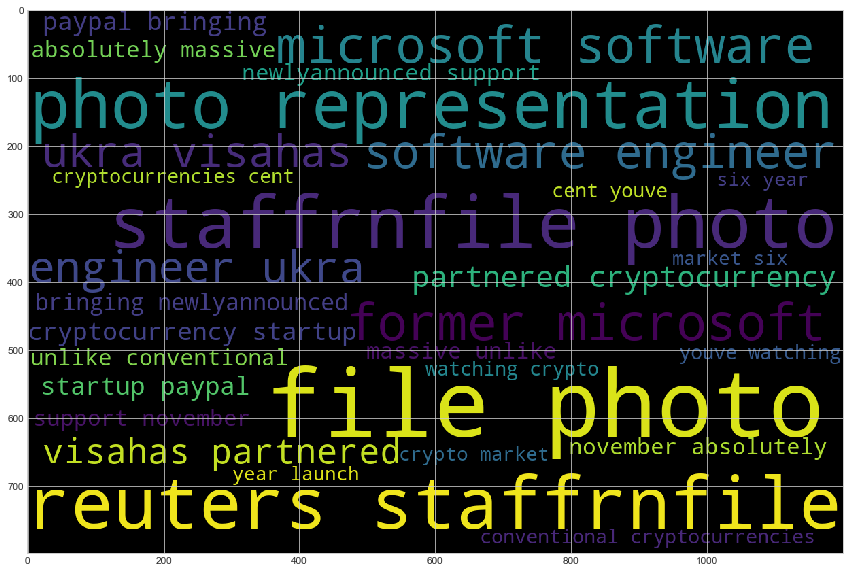

In [39]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def stringmaker(words):
    big_string = " ".join(words)
    return big_string

btc_words = stringmaker(btc_words)
eth_words = stringmaker(eth_words)

btc_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(btc_words)

plt.imshow(btc_word_cloud)

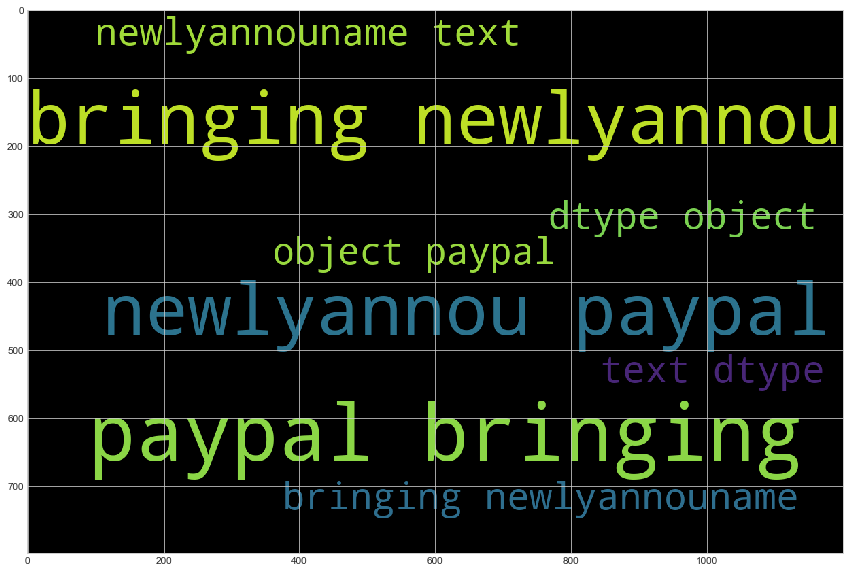

In [40]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(eth_words)

plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [44]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
articles = bitcoin_df["Text"].str.cat()
articles

'0     A former Microsoft software engineer from Ukra...\n1     Visa\xa0has partnered with cryptocurrency startup...\n2     PayPal is bringing its newly-announced support...\n3     In November 2017, after an absolutely massive,...\n4     Unlike ‘conventional’ cryptocurrencies, a cent...\n5     If youve been watching the crypto markets over...\n6     Six years after the launch of the Mexico-based...\n7     Decentralized exchange protocols that allow cr...\n8                                                  None\n9     4. U.S. markets ended November with large gain...\n10    Maisie Williams also known as Arya Stark, daug...\n11    1 with 1 posters participating\\r\\nA former Mic...\n12    8 with 7 posters participating\\r\\nBitcoin rose...\n13    FILE PHOTO: Representations of virtual currenc...\n14    By Justin HarperBusiness reporter, BBC News\\r\\...\n15    Posted \\r\\nBitcoin has grabbed headlines this ...\n16    By Reuters Staff\\r\\nFILE PHOTO: A representati...\n17    FILE PHOTO:

In [45]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title'] = 'Bitcoin NER'

In [46]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [47]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent, ent.label_)

Microsoft ORG
Ukra ORG
1 CARDINAL
Visa ORG
2 CARDINAL
3 CARDINAL
November 2017 DATE
4 CARDINAL
a cent MONEY
5 CARDINAL
6      QUANTITY
Mexico GPE
7 CARDINAL
8 CARDINAL
9 CARDINAL
4 CARDINAL
U.S. GPE
November DATE
10 CARDINAL
Williams PERSON
Arya Stark PERSON
11 CARDINAL
1 CARDINAL
1 CARDINAL
Mic PERSON
12 CARDINAL
8 CARDINAL
7 CARDINAL
13 CARDINAL
14 CARDINAL
Justin HarperBusiness ORG
BBC News\r\ ORG
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDINAL
LONDON GPE
Reuters ORG
19 CARDINAL
Microsoft ORG
Ukra ORG
1 CARDINAL
Visa ORG
2 CARDINAL
3 CARDINAL
November 2017 DATE
4 CARDINAL
a cent MONEY
5 CARDINAL
6      QUANTITY
Mexico GPE
7 CARDINAL
8 CARDINAL
9 CARDINAL
4 CARDINAL
U.S. GPE
November DATE
10 CARDINAL
Williams PERSON
Arya Stark PERSON
11 CARDINAL
1 CARDINAL
1 CARDINAL
Mic PERSON
12 CARDINAL
8 CARDINAL
7 CARDINAL
13 CARDINAL
14 CARDINAL
Justin HarperBusiness ORG
BBC News\r\ ORG
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDINAL
LONDON GPE
Reuters ORG
19 CARDINAL
Microsoft ORG
Ukra ORG
1 C

---

### Ethereum NER

In [48]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
articles = ethereum_df["Text"].str.cat()
articles

'0     0     0     PayPal is bringing its newly-annou...\n1     0     0     PayPal is bringing its newly-annou...\n2     0     0     PayPal is bringing its newly-annou...\n3     0     0     PayPal is bringing its newly-annou...\n4     0     0     PayPal is bringing its newly-annou...\n5     0     0     PayPal is bringing its newly-annou...\n6     0     0     PayPal is bringing its newly-annou...\n7     0     0     PayPal is bringing its newly-annou...\n8     0     0     PayPal is bringing its newly-annou...\n9     0     0     PayPal is bringing its newly-annou...\n10    0     0     PayPal is bringing its newly-annou...\n11    0     0     PayPal is bringing its newly-annou...\n12    0     0     PayPal is bringing its newly-annou...\n13    0     0     PayPal is bringing its newly-annou...\n14    0     0     PayPal is bringing its newly-annou...\n15    0     0     PayPal is bringing its newly-annou...\n16    0     0     PayPal is bringing its newly-annou...\n17    0     0     PayPal is br

In [49]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title'] = 'Ethereum NER'

In [50]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [51]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent, ent.label_)

1      QUANTITY
2      QUANTITY
3 CARDINAL
4      QUANTITY
5 CARDINAL
6      QUANTITY
7      QUANTITY
8      QUANTITY
9      QUANTITY
10 CARDINAL
11 CARDINAL
12 CARDINAL
13 CARDINAL
14 CARDINAL
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDINAL
19 CARDINAL
1      QUANTITY
2      QUANTITY
3 CARDINAL
4      QUANTITY
5 CARDINAL
6      QUANTITY
7      QUANTITY
8      QUANTITY
9      QUANTITY
10 CARDINAL
11 CARDINAL
12 CARDINAL
13 CARDINAL
14 CARDINAL
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDINAL
19 CARDINAL
1      QUANTITY
2      QUANTITY
3 CARDINAL
4      QUANTITY
5 CARDINAL
6      QUANTITY
7      QUANTITY
8      QUANTITY
9      QUANTITY
10 CARDINAL
11 CARDINAL
12 CARDINAL
13 CARDINAL
14 CARDINAL
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDINAL
19 CARDINAL
1      QUANTITY
2      QUANTITY
3 CARDINAL
4      QUANTITY
5 CARDINAL
6      QUANTITY
7      QUANTITY
8      QUANTITY
9      QUANTITY
10 CARDINAL
11 CARDINAL
12 CARDINAL
13 CARDINAL
14 CARDINAL
15 CARDINAL
16 CARDINAL
17 CARDINAL
18 CARDI

---